# Campo electrico no ideal 


In [1]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
from scipy.interpolate import RegularGridInterpolator
import scienceplots

import Boris as boris

#para leer los archivos necesitas instalar el paquete h5py, que lee archivos en formato hdf5 que es el formato de archivos que escribe el codigo de la simulacion.

name='C:/Users/lueiz/Desktop/Intro a la Investigación 2/flds.tot.00085'

f=h5py.File(name,'r') #llamamos al archivo en modo de lectura 'r'
bx=f.get('bx') #obtenemos el campo magnetico en x
bx=np.array(bx)[0,:,:] #fijamos en 0 la primera componente del arreglo porque siempre son en 3 dimensiones, sin embargo la primera tiene solo un elemento
bx=np.transpose(bx) #trasponemos porque la forma en que escribe el codigo y lee python deja las matrices traspuestas

by=f.get('by') #obtenemos el campo magnetico en x
by=np.array(by)[0,:,:] #fijamos en 0 la primera componente del arreglo porque siempre son en 3 dimensiones, sin embargo la primera tiene solo un elemento
by=np.transpose(by) #trasponemos porque la forma en que escribe el codigo y lee python deja las matrices traspuestas

bz=f.get('bz') #obtenemos el campo magnetico en x
bz=np.array(bz)[0,:,:] #fijamos en 0 la primera componente del arreglo porque siempre son en 3 dimensiones, sin embargo la primera tiene solo un elemento
bz=np.transpose(bz) #trasponemos porque la forma en que escribe el codigo y lee python deja las matrices traspuestas

ex=f.get('ex') #obtenemos el campo magnetico en x
ex=np.array(ex)[0,:,:] #fijamos en 0 la primera componente del arreglo porque siempre son en 3 dimensiones, sin embargo la primera tiene solo un elemento
ex=np.transpose(ex) #trasponemos porque la forma en que escribe el codigo y lee python deja las matrices traspuestas

ey=f.get('ey') #obtenemos el campo magnetico en x
ey=np.array(ey)[0,:,:] #fijamos en 0 la primera componente del arreglo porque siempre son en 3 dimensiones, sin embargo la primera tiene solo un elemento
ey=np.transpose(ey) #trasponemos porque la forma en que escribe el codigo y lee python deja las matrices traspuestas

ez=f.get('ez') #obtenemos el campo magnetico en x
ez=np.array(ez)[0,:,:] #fijamos en 0 la primera componente del arreglo porque siempre son en 3 dimensiones, sin embargo la primera tiene solo un elemento
ez=np.transpose(ez) #trasponemos porque la forma en que escribe el codigo y lee python deja las matrices traspuestas

vx=f.get('v3x') #obtenemos el campo magnetico en x
vx=np.array(vx)[0,:,:] #fijamos en 0 la primera componente del arreglo porque siempre son en 3 dimensiones, sin embargo la primera tiene solo un elemento
vx=np.transpose(vx) #trasponemos porque la forma en que escribe el codigo y lee python deja las matrices traspuestas

vy=f.get('v3y') #obtenemos el campo magnetico en x
vy=np.array(vy)[0,:,:] #fijamos en 0 la primera componente del arreglo porque siempre son en 3 dimensiones, sin embargo la primera tiene solo un elemento
vy=np.transpose(vy) #trasponemos porque la forma en que escribe el codigo y lee python deja las matrices traspuestas

vz=f.get('v3z') #obtenemos el campo magnetico en x
vz=np.array(vz)[0,:,:] #fijamos en 0 la primera componente del arreglo porque siempre son en 3 dimensiones, sin embargo la primera tiene solo un elemento
vz=np.transpose(vz) #trasponemos porque la forma en que escribe el codigo y lee python deja las matrices traspuestas

#para las demas componentes del campo magnetico tienes que usar get('by') o 'bz', si quieres el campo electrico están en 'ex', 'ey' y 'ez'

b=np.array((bx,by,bz))

e=np.array((ex,ey,ez))

v=np.array((vx,vy,vz))

Nx=np.size(b[0,:,0])

Ny=np.size(b[0,0,:])

# drift_vel= np.loadtxt('C:/Users/lueiz/Desktop/Intro a la Investigación 2/Introduccion-a-la-Investigacion-II/velocity_drift_00085.txt').reshape(b.shape)

#gamma1= np.loadtxt('/content/gamma1.txt')

print(np.shape(e))


(3, 5250, 1536)


In [2]:
# Estre codigo sera para obtener el E no ideal e ideal

e_i = -np.cross(v, b, axis=0)

e_ni=e-e_i

# Obtenemos el modulo

E_i=np.linalg.norm(e_i,axis=0)

E_ni=np.linalg.norm(e_ni,axis=0)


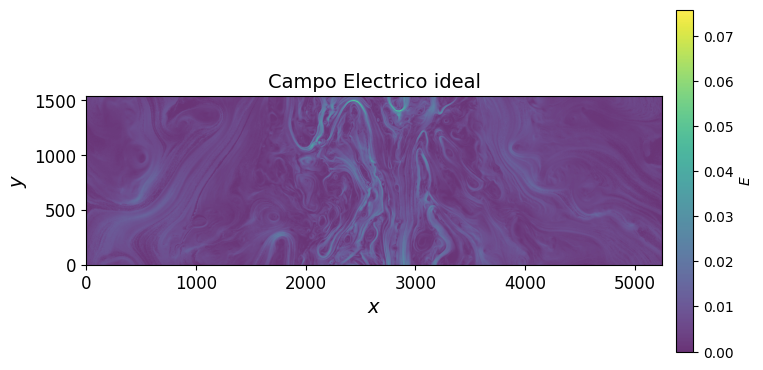

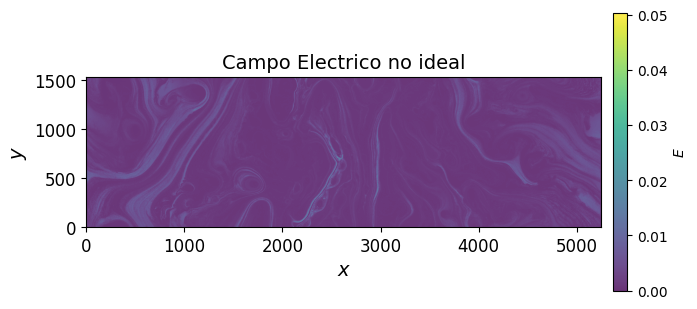

In [5]:


x=np.arange(0,Nx)
y=np.arange(0,Ny)

fig = plt.figure(figsize=(8, 6))

plt.imshow(E_i.T, origin='lower', extent=[x.min(), x.max(), y.min(), y.max()], cmap='viridis', alpha=0.8)
cbar = plt.colorbar(label='$E$', orientation='vertical', shrink=0.6, pad=0.02)  # Ajusta el tamaño y la posición
plt.xlabel('$x$', fontsize=14)
plt.ylabel('$y$', fontsize=14)
plt.title('Campo Electrico ideal', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
# plt.legend()
plt.tight_layout()

plt.show()


fig = plt.figure(figsize=(8, 6))

plt.imshow(E_ni.T, origin='lower', extent=[x.min(), x.max(), y.min(), y.max()], cmap='viridis', alpha=0.8)
cbar = plt.colorbar(label='$E$', orientation='vertical', shrink=0.6, pad=0.02)  # Ajusta el tamaño y la posición
plt.xlabel('$x$', fontsize=14)
plt.ylabel('$y$', fontsize=14)
plt.title('Campo Electrico no ideal', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
# plt.legend()

plt.show()

#Nice

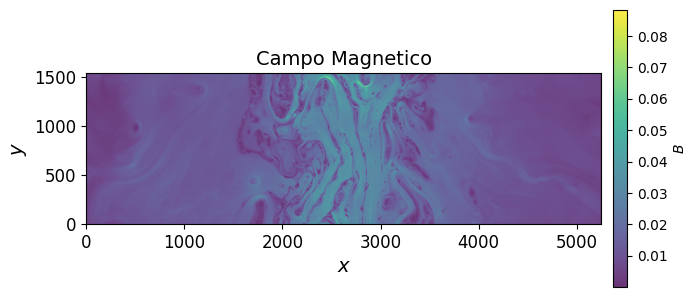

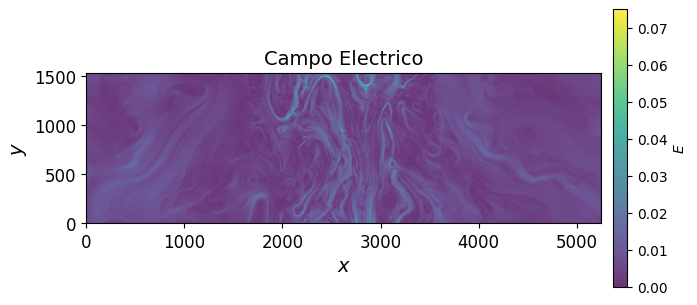

In [6]:
# Ahora lo que haremos sera discernir en cuales de las zonas consideraremos que el campo electrico es grande, para eso veremos primero
# en que lugares el campo electrico total, es un 10% del campo magnetico, luego veremos en cuales domina la parte no ideal, con respecto
# a la parte ideal y viceversa.

# Obtenemos el modulo del campo magnetico

B=np.linalg.norm(b,axis=0)

fig = plt.figure(figsize=(8, 6))

plt.imshow(B.T, origin='lower', extent=[x.min(), x.max(), y.min(), y.max()], cmap='viridis', alpha=0.8)
cbar = plt.colorbar(label='$B$', orientation='vertical', shrink=0.6, pad=0.02)  # Ajusta el tamaño y la posición
plt.xlabel('$x$', fontsize=14)
plt.ylabel('$y$', fontsize=14)
plt.title('Campo Magnetico', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
# plt.legend()

plt.show()

E=np.linalg.norm(e,axis=0)

fig = plt.figure(figsize=(8, 6))

plt.imshow(E.T, origin='lower', extent=[x.min(), x.max(), y.min(), y.max()], cmap='viridis', alpha=0.8)
cbar = plt.colorbar(label='$E$', orientation='vertical', shrink=0.6, pad=0.02)  # Ajusta el tamaño y la posición
plt.xlabel('$x$', fontsize=14)
plt.ylabel('$y$', fontsize=14)
plt.title('Campo Electrico', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
# plt.legend()

plt.show()

# Nice

[[   5    5    5 ... 5243 5243 5243]
 [   4   16   27 ... 1490 1491 1506]]


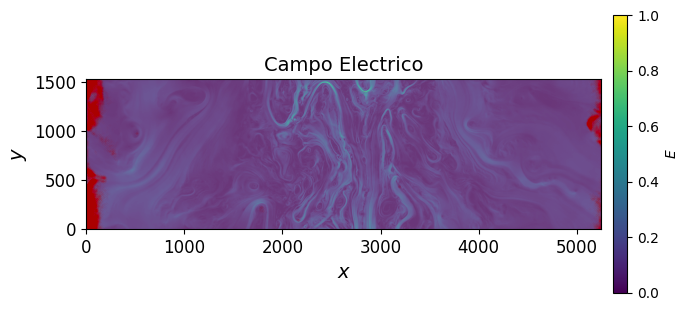

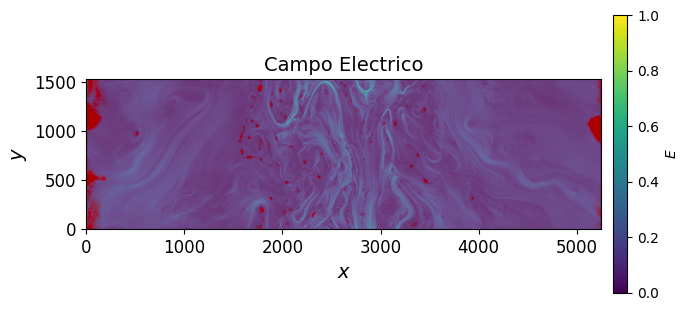

Número de puntos donde E_ni > E_i: 97904
Número de puntos donde E_i > E_ni: 107612
¿Hay intersección? No


In [65]:
# Ahora veremos cuales son las zonas con alto E y alto E no ideal e ideal

rate=1

mask_condition = (E >= rate * B)

E_ni_high_index=np.array(np.nonzero(mask_condition & (E_ni>E_i)))

E_i_high_index=np.array(np.nonzero(mask_condition & (E_i>E_ni)))

print(E_ni_high_index)

fig = plt.figure(figsize=(8, 6))

plt.imshow(E.T, origin='lower', extent=[x.min(), x.max(), y.min(), y.max()], cmap='viridis', alpha=0.8)
plt.scatter(E_i_high_index[0], E_i_high_index[1], c='red', marker='o',s=0.0001)  # Invertir los ejes para obtener (x, y)
cbar = plt.colorbar(label='$E$', orientation='vertical', shrink=0.6, pad=0.02)  # Ajusta el tamaño y la posición
plt.xlabel('$x$', fontsize=14)
plt.ylabel('$y$', fontsize=14)
plt.title('Campo Electrico', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
# plt.legend()

plt.show()

fig = plt.figure(figsize=(8, 6))

plt.imshow(E.T, origin='lower', extent=[x.min(), x.max(), y.min(), y.max()], cmap='viridis', alpha=0.8)
plt.scatter(E_ni_high_index[0], E_ni_high_index[1], c='red', marker='o',s=0.0001)  # Invertir los ejes para obtener (x, y)
cbar = plt.colorbar(label='$E$', orientation='vertical', shrink=0.6, pad=0.02)  # Ajusta el tamaño y la posición
plt.xlabel('$x$', fontsize=14)
plt.ylabel('$y$', fontsize=14)
plt.title('Campo Electrico', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
# plt.legend()

plt.show()

# Script para poder saber si los conjuntos intersectan

# Cantidad de puntos en los arrays
num_E_ni = E_ni_high_index.size/2
num_E_i = E_i_high_index.size/2

# Verificar si hay intersección entre los dos conjuntos
interseccion = np.any(np.array([np.array_equal(x, y) for x in E_ni_high_index for y in E_i_high_index]))

# Informar resultados
print(f"Número de puntos donde E_ni > E_i: {num_E_ni}")
print(f"Número de puntos donde E_i > E_ni: {num_E_i}")
print(f"¿Hay intersección? {'Sí' if interseccion.any() else 'No'}")